<a href="https://colab.research.google.com/github/Kishore-78-250/My-Projects/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (113999, 22)

Columns:
 ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'duration_min']


/tmp/ipython-input-3940674096.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3940674096.py:19: UserWarning:

Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.



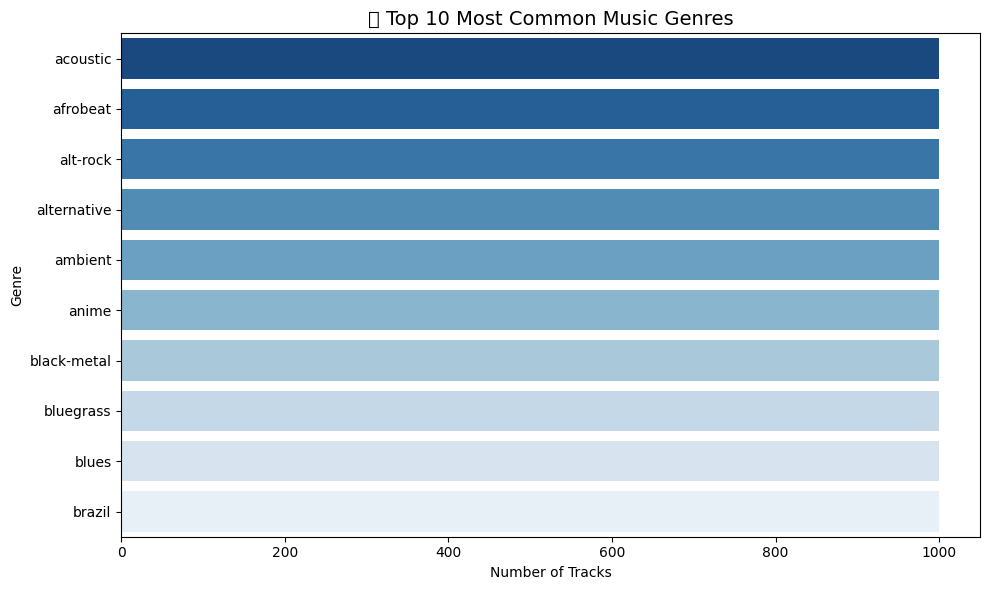

/tmp/ipython-input-3940674096.py:27: UserWarning:

Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.



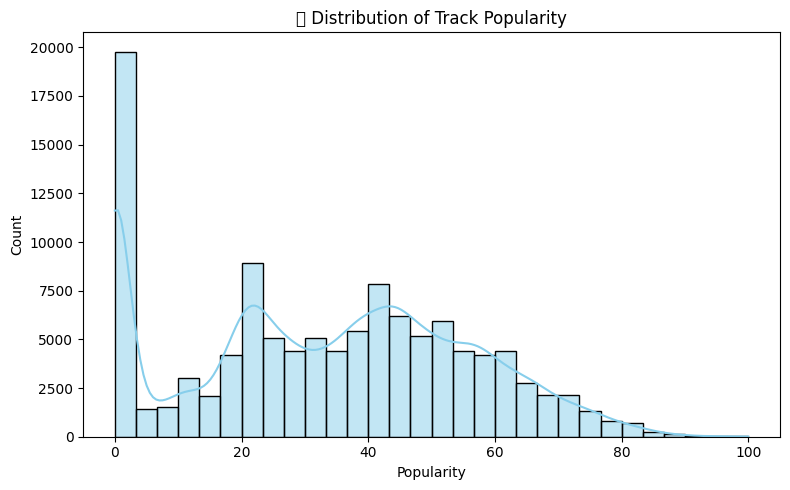

/tmp/ipython-input-3940674096.py:37: UserWarning:

Glyph 128131 (\N{DANCER}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128131 (\N{DANCER}) missing from font(s) DejaVu Sans.



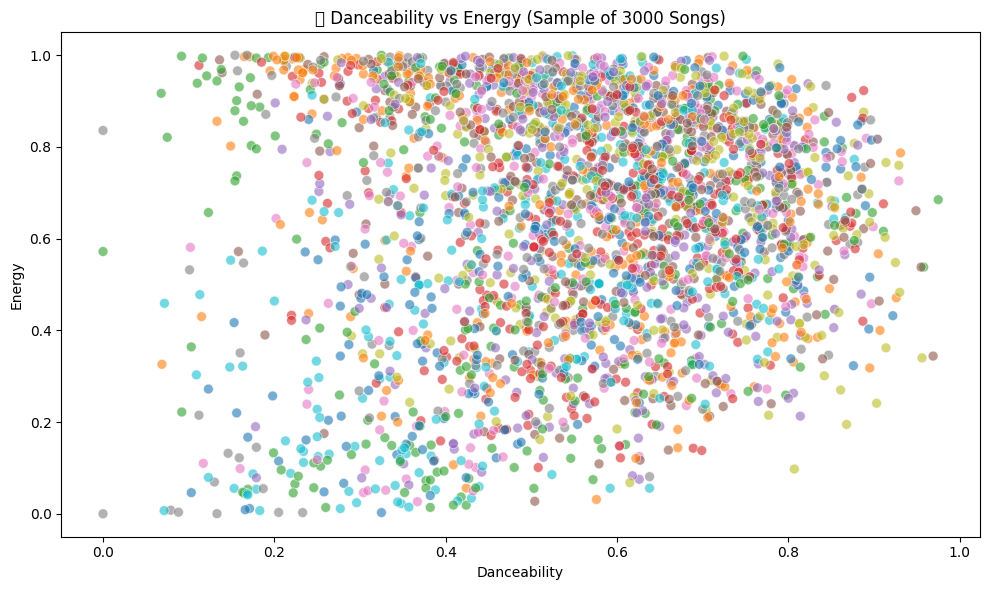

/tmp/ipython-input-3940674096.py:48: UserWarning:

Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.



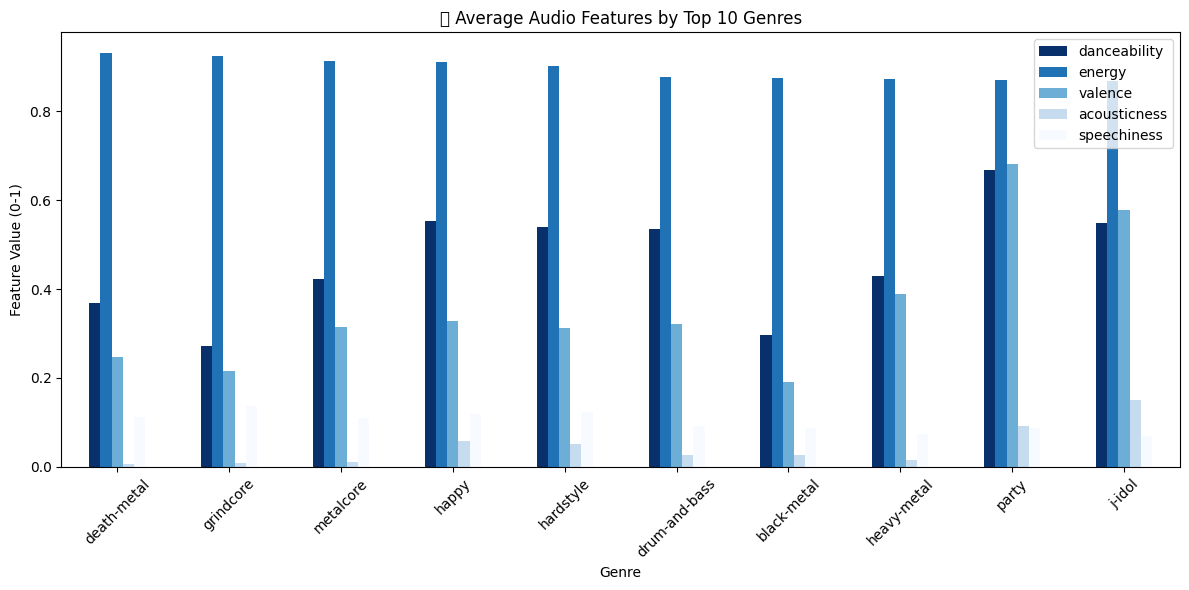

/tmp/ipython-input-3940674096.py:55: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



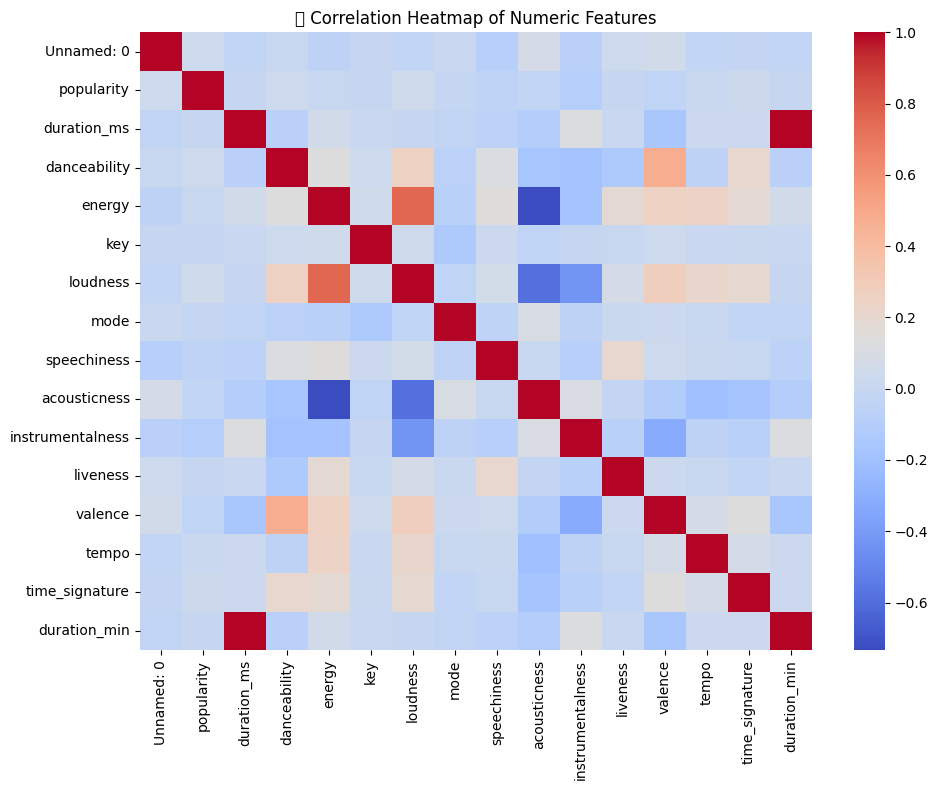


--- Quick Insights ---
🎧 Average popularity: 33.24
💃 Average danceability: 0.57
🎼 Most common genre: acoustic


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("dataset.csv")

df.dropna(subset=["artists", "track_name", "album_name"], inplace=True)
df["duration_min"] = df["duration_ms"] / 60000  # convert ms → minutes

print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
plt.figure(figsize=(10, 6))
top_genres = df["track_genre"].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="Blues_r")
plt.title("🎵 Top 10 Most Common Music Genres", fontsize=14)
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df["popularity"], bins=30, kde=True, color="skyblue")
plt.title("⭐ Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(3000, random_state=42),
                x="danceability", y="energy", hue="track_genre",
                alpha=0.6, s=50, palette="tab10", legend=False)
plt.title("💃 Danceability vs Energy (Sample of 3000 Songs)")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()

features = ["danceability", "energy", "valence", "acousticness", "speechiness"]
genre_features = df.groupby("track_genre")[features].mean().sort_values("energy", ascending=False).head(10)

genre_features.plot(kind="bar", figsize=(12, 6), colormap="Blues_r")
plt.title("🎼 Average Audio Features by Top 10 Genres")
plt.ylabel("Feature Value (0-1)")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=["float64", "int64"])
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", annot=False)
plt.title("🔥 Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()
fig = px.scatter(df.sample(3000, random_state=42),
                 x="tempo", y="valence",
                 color="track_genre",
                 size="popularity",
                 hover_data=["artists", "track_name"],
                 title="🎶 Tempo vs Valence (Mood of Songs)",
                 color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

print("\n--- Quick Insights ---")
print("🎧 Average popularity:", round(df['popularity'].mean(), 2))
print("💃 Average danceability:", round(df['danceability'].mean(), 2))
print("🎼 Most common genre:", df['track_genre'].mode()[0])
